<a href="https://colab.research.google.com/github/NowAuthority/Machine-Learning/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.52      0.25      0.34        67

    accuracy                           0.86       480
   macro avg       0.70      0.61      0.63       480
weighted avg       0.84      0.86      0.84       480

k-NN Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.55      0.45      0.49        67

    accuracy                           0.87       480
   macro avg       0.73      0.69      0.71       480
weighted avg       0.86      0.87      0.87       480

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.50      0.63      0.56        67

    accuracy                           0.86       480
   macro avg       0.72      0.76      0.74       480
weighte

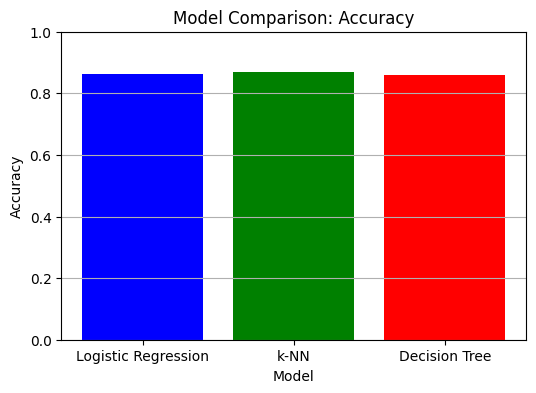

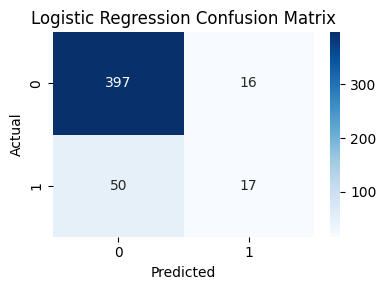

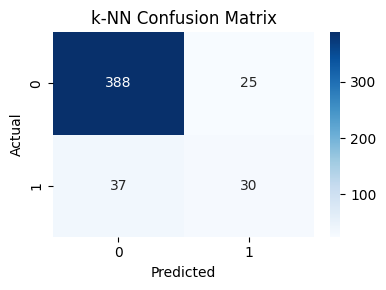

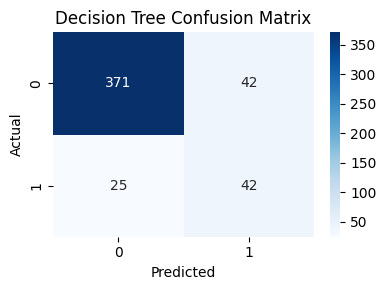

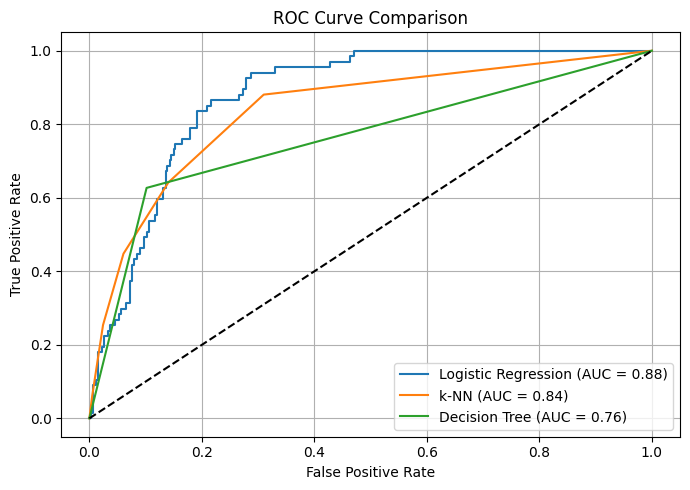

In [ ]:
# Step 1: Import packages and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# Load and clean dataset
df = pd.read_csv('winequality-red.csv')  # File must be comma-separated
df.columns = df.columns.str.strip()

# Convert quality to binary: 1 = good (quality > 6), 0 = bad
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)

# Split data into features and target
X = df.drop(columns=['quality'])
y = df['quality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features for k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dtree = dtree.predict(X_test)

# Classification Reports
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("k-NN Report:\n", classification_report(y_test, y_pred_knn))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dtree))

# Accuracy Comparison Bar Chart
models = ['Logistic Regression', 'k-NN', 'Decision Tree']
accuracies = [
    logreg.score(X_test, y_test),
    knn.score(X_test_scaled, y_test),
    dtree.score(X_test, y_test)
]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Comparison: Accuracy')
plt.grid(axis='y')
plt.show()

# Confusion Matrices
predictions = {
    'Logistic Regression': y_pred_logreg,
    'k-NN': y_pred_knn,
    'Decision Tree': y_pred_dtree
}

for model_name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# ROC Curves
plt.figure(figsize=(7, 5))

# Logistic Regression
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')

# k-NN
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {auc_knn:.2f})')

# Decision Tree
y_prob_dtree = dtree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_prob_dtree)
auc_dtree = auc(fpr_dtree, tpr_dtree)
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {auc_dtree:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
